# clusters of schools
https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1

In [531]:
from importlib import reload
import houses.__main__
reload(houses.__main__)
from houses.__main__ import SchoolsStorage

In [532]:
storage = SchoolsStorage.init()

In [5]:
import pandas as pd

In [71]:
df =  pd.DataFrame(storage.iter_school_urn_to_coordinates("London"))
print(len(df))
df.head(3)

510


,urn,latitude,longitude
0,100001,51.519129,-0.094509
1,100002,51.513834,-0.096820
2,100049,51.544842,-0.154354


## One method to validate the number of clusters is the elbow method.

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).

When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

This might take a while.. stretch a little.

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [72]:
def plot_elbow(k):
    k_clusters = range(1, k)
    kmeans = [KMeans(n_clusters=i) for i in k_clusters]
    y_axis = df[['latitude']]
    x_axis = df[['longitude']]
    score = [kmeans[i].fit(y_axis).score(y_axis) for i in range(len(kmeans))]
    # Visualize
    plt.plot(k_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

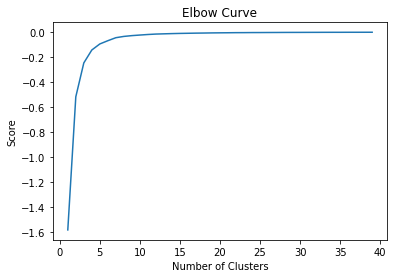

CPU times: user 5.64 s, sys: 108 ms, total: 5.75 s
Wall time: 2.93 s


In [73]:
%time plot_elbow(40)

When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

In [499]:
KMeans?

In [500]:
def cluster_schools_by_location(*, dataframe, n_scools_in_cluster):
    kmeans = KMeans(n_clusters = int(len(dataframe) / n_scools_in_cluster), init ='random')
    coordinates = dataframe.columns[dataframe.columns.get_loc('latitude'):dataframe.columns.get_loc('longitude') + 1]
    kmeans.fit(dataframe[coordinates]) # Compute k-means clustering.
    dataframe['cluster_label'] = kmeans.fit_predict(dataframe[coordinates])
    centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
    labels = kmeans.predict(dataframe[coordinates]) # Labels of each point
    return centers, labels

In [119]:
def get_cluster(*, dataframe, cluster_n):
    return dataframe[dataframe['cluster_label']==cluster_n]

In [75]:
cluster_1 = df[df['cluster_label']==1]
cluster_1.head()
print(list(cluster_1["urn"]))
cluster_df = pd.DataFrame(storage.iter_schools_by_urn(cluster_1["urn"]))
cluster_df.head()

['134735', '138607', '141617']


,_id,urn,laname,la,estab,laestab,schname,street,locality,address3,...,schooltype,isprimary,issecondary,ispost16,agelow,agehigh,gender,relchar,admpol,location
0,134735,134735,Hammersmith and Fulham,205,6404,2056404,Chelsea Independent College,517 - 523 Fulham Road,,,...,Other independent school,0,1,1,14,21,Mixed,None,Not applicable,"{'postcode': 'SW6 1HD', 'status': 'live', 'use..."
1,138607,138607,Hammersmith and Fulham,205,4632,2054632,Lady Margaret School,Parson's Green,,,...,Academy converter,0,1,1,11,18,Girls,Church of England,Non-selective,"{'postcode': 'SW6 4UN', 'status': 'live', 'use..."
2,141617,141617,Hammersmith and Fulham,205,4002,2054002,The Hurlingham Academy,Peterborough Road,Fulham,,...,Academy sponsor led,0,1,0,11,16,Mixed,Does not apply,Non-selective,"{'postcode': 'SW6 3ED', 'status': 'live', 'use..."


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

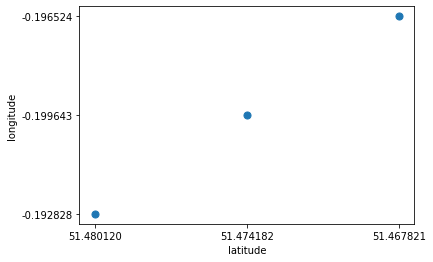

In [83]:
cluster_1.plot.scatter(x = 'latitude', y = 'longitude', s=50, cmap='viridis')

## In London only

In [426]:
all_schools_df =  pd.DataFrame(storage.iter_schools(towns=["London"], agehigh=18, ignore_girls_school=True))
print(len(all_schools_df))
all_schools_df.head(3)

143


,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname,agehigh,agelow
0,100049,NW3 2BQ,London,Chalk Farm,Camden,Community school,Maintained school,51.544842,-0.154354,Haverstock School,18,11
1,100051,NW1 1RX,London,Camden,Camden,Community school,Maintained school,51.533057,-0.133423,Regent High School,18,11
2,100052,NW2 3RT,London,Hampstead,Camden,Community school,Maintained school,51.555614,-0.207047,Hampstead School,18,11


In [218]:
cluster_schools_by_location(dataframe=all_schools_df, n_scools_in_cluster=3)

all_schools_df.head(3)

,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname,cluster_label
0,100002,EC4M 9AD,London,,City of London,Other independent school,Independent school,51.513834,-0.096820,St Paul's Cathedral School,79
1,100049,NW3 2BQ,London,Chalk Farm,Camden,Community school,Maintained school,51.544842,-0.154354,Haverstock School,34
2,100051,NW1 1RX,London,Camden,Camden,Community school,Maintained school,51.533057,-0.133423,Regent High School,105


In [222]:
"N of clusters: " + str(max(all_schools_df.cluster_label.unique()))

'N of clusters: 134'

In [236]:
# filter out clusters that have less than 2 schools
# has_at_least_2_schls = all_schools_df.groupby('cluster_label').filter(lambda x: len(x) > 1)
has_at_least_2_schls = all_schools_df # .groupby('cluster_label').filter(lambda x: len(x) > 1)

len(has_at_least_2_schls.cluster_label.unique())

135

In [240]:
get_cluster(dataframe=has_at_least_2_schls, cluster_n=29)

,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname,cluster_label
30,100374,SW6 6DA,London,Fulham,Hammersmith and Fulham,Other independent school,Independent school,51.477870,-0.210808,Sinclair House School,29
164,131165,W14 9SD,London,,Hammersmith and Fulham,Other independent school,Independent school,51.486641,-0.210531,Fulham School,29
173,131675,SW6 6EG,London,Fulham,Hammersmith and Fulham,Other independent special school,Special school,51.472641,-0.214751,The Moat School,29


In [288]:
folium.Popup?

## Visualise cluster

In [489]:
import folium
import itertools
import folium.vector_layers


def make_popup(school):
    return folium.Popup(max_width=450, html=f"""
<b>{school['schname']}</b> in {school['town']}
</br>
Postcode: {school['postcode']}</br>
Group: {school['minorgroup']}</br>
Type: {school['schooltype']}</br>
Age: {school['agelow']} - {school['agehigh']}</br>
""")

def make_marker(*, school: dict, circle_radius_meters=None) -> folium.Marker:
    marker_cls = folium.Circle if circle_radius_meters else folium.Marker
    attrs = dict(radius=circle_radius_meters,
                color='#3186cc',
    fill=True,
    fill_color='#3186cc'
                ) if circle_radius_meters else {}
    return marker_cls(
            [school.latitude, school.longitude], 
            popup=make_popup(school), 
            tooltip=school.schname,
            # icon=folium.Icon(color='green'),
            **attrs,
        )
    

def vis_schools(*, dataframe, cluster_n, radius_around_schl_meters=0):
    rows = dataframe.iterrows()
    idx, first = next(rows)
    m = folium.Map(location=[first['latitude'], first['longitude']],
                # tiles='Stamen Toner', 
                zoom_start=13)
    polygon_locations = []
    for idx, school in itertools.chain(((idx, first),), rows):
        make_marker(school=school, circle_radius_meters=radius_around_schl_meters).add_to(m)
        polygon_locations.append((school['latitude'], school['longitude']))
    # m.add_child(folium.ClickForMarker(popup='Interest'))
#     m.add_child(folium.vector_layers.Polygon(locations=polygon_locations))
    
    return m

def vis_cluster(*, dataframe, cluster_n):
    cluster = get_cluster(dataframe=dataframe, cluster_n=cluster_n)
    return cluster, vis_schools(dataframe=cluster, cluster_n=cluster_n)

In [534]:
def collect_and_vis(*, towns=None, boroughs=None, n_schools_in_cluster=3, radius_around_schl_meters=0, postcode_areas=(), agehigh=18, ignore_girls_school=True):
    all_schools_df =  pd.DataFrame(storage.iter_schools(towns=towns, boroughs=boroughs, postcode_areas=postcode_areas, agehigh=agehigh, ignore_girls_school=ignore_girls_school))
    print(f'Total schools found: {len(all_schools_df)}')
    if not len(all_schools_df):
        return None, None
    if len(all_schools_df) <= n_schools_in_cluster:
        filtered_by_min_schools_number = all_schools_df
    else:
        cluster_schools_by_location(dataframe=all_schools_df, n_scools_in_cluster=n_schools_in_cluster)
        print("N of clusters: " + str(max(all_schools_df.cluster_label.unique())))
        filtered_by_min_schools_number = all_schools_df.groupby('cluster_label').filter(
            lambda x: len(x) >= n_schools_in_cluster)

        print(f'After filtering clusters by min number ({n_schools_in_cluster}) of schools: '
              f'{len(filtered_by_min_schools_number.cluster_label.unique())} clusters left')
    return filtered_by_min_schools_number, vis_schools(dataframe=filtered_by_min_schools_number, cluster_n='all', radius_around_schl_meters=radius_around_schl_meters)

# Add properties

In [465]:
import houses.zoopla
reload(houses.zoopla)
from houses.zoopla import ListedProperty
zoopla = houses.zoopla.get_client(token="jd74f2eeskshemzzdaxuzqhw")

In [428]:
def make_property_popup(listed: ListedProperty):
    floor_plan = '\n</br>'.join([
        f'<img src="{plan_img_url}" style="width: 50%; height: 50%"></img>'
        for plan_img_url in listed.floor_plan
    ]
    )
    return folium.Popup(max_width=950, max_height=950, html=f"""
    <a href="https://www.zoopla.co.uk/for-sale/details/{listed.listing_id}">Zoopla link</a>
</br>{listed.property_type} - {listed.num_bathrooms}🛀 - £{listed.price}
</br>
</br>Bedrooms: {listed.num_bedrooms}
</br><img src="{listed.image_80_60_url}"></img>
</br>{floor_plan}
""")
    

def make_property_marker(*, listed: ListedProperty) -> folium.Marker:
    return folium.Marker(
            [listed.latitude, listed.longitude], 
            popup=make_property_popup(listed), 
            tooltip=f'{listed.property_type} - {listed.num_bedrooms}beds - £{listed.price}',
            icon=folium.Icon(color='green'),
        )

def add_properties_to_map(*, zoopla_client, map, dataframe, radius_miles=0.5, maximum_price=400_000, min_beds=2):
    postcodes = dataframe.postcode.unique().tolist()
    print(f'Search properties for postcodes: {postcodes}')
    listings = [
        listing
        for postcode in postcodes
        for result in (zoopla_client.list_listings(
            postcode=postcode, 
            radius_miles=radius_miles, 
            maximum_price=maximum_price, 
            minimum_beds=min_beds),)
        for listing in result.listing
    ]
    print(f'Found {len(listings)} properties in listing')
    for l in listings:
        make_property_marker(listed=l).add_to(map)

In [533]:
clustered, map = collect_and_vis(towns=['Esher'], boroughs=['Hillingdon'],
                                 n_schools_in_cluster=2, 
                                 radius_around_schl_meters=0, 
                                 agehigh=18,
                                 postcode_areas=())


TypeError: collect_and_vis() got an unexpected keyword argument 'boroughs'

In [508]:
cluster = clustered

In [507]:
clustered.head(6)

,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname,agehigh,agelow
0,125334,KT10 9LY,Esher,,Surrey,Other independent school,Independent school,51.358486,-0.370658,Claremont Fan Court School,18,2
1,137855,KT10 0AQ,Esher,Hinchley Wood,Surrey,Academy converter,Academy,51.378597,-0.331916,Hinchley Wood School,18,11


In [492]:
cluster, map = vis_cluster(dataframe=clustered, cluster_n=0)

In [512]:
add_properties_to_map(zoopla_client=zoopla, map=map, dataframe=cluster, maximum_price=400_000, min_beds=2)

Search properties for postcodes: ['KT10 9LY', 'KT10 0AQ']
Found 11 properties in listing


In [513]:
map

# all schools we like

In [546]:
clustered, map = collect_and_vis(agehigh=18, towns=('Ealing',), ignore_girls_school=False, n_schools_in_cluster=2)
add_properties_to_map(zoopla_client=zoopla, map=map, dataframe=clustered, maximum_price=400_000, min_beds=2)
map

Total schools found: 1
Search properties for postcodes: ['W3 8JY']
Found 8 properties in listing
